In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [2]:
dataset_path = "Online_Retail.csv"
data = pd.read_csv(dataset_path)

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
166881,550956,22977,DOLLY GIRL CHILDRENS EGG CUP,4,4/21/2011 16:37,1.25,17179.0,United Kingdom
327622,565682,23282,FOLDING BUTTERFLY MIRROR IVORY,1,9/6/2011 10:42,0.83,14796.0,United Kingdom
430426,573585,21731,RED TOADSTOOL LED NIGHT LIGHT,10,10/31/2011 14:41,3.29,NaN,United Kingdom
274582,560926,21375,LARGE CAMPHOR WOOD FIELD MUSHROOM,2,7/22/2011 9:20,10.79,NaN,United Kingdom
25394,538368,22549,PICTURE DOMINOES,1,12/12/2010 10:57,1.45,15503.0,United Kingdom
309622,564135,22457,NATURAL SLATE HEART CHALKBOARD,5,8/23/2011 11:12,2.95,16550.0,United Kingdom
428442,573430,21672,WHITE SPOT RED CERAMIC DRAWER KNOB,12,10/31/2011 10:38,1.45,13813.0,Germany
431,536406,22803,IVORY EMBROIDERED QUILT,2,12/1/2010 11:33,35.75,17850.0,United Kingdom
308517,564021,21755,LOVE BUILDING BLOCK WORD,2,8/22/2011 11:58,5.95,NaN,United Kingdom
310523,564187,23301,GARDENERS KNEELING PAD KEEP CALM,3,8/23/2011 15:24,1.65,15005.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
print("Duplicates:", data.duplicated().sum())

Duplicates: 5268


In [7]:
print("Null values:" , data.isnull().sum().sum())

Null values: 136534


In [8]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
data['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [10]:
data = data.drop_duplicates()

In [11]:
data["Description"] = data["Description"].fillna("Unknown")

In [12]:
data = data.dropna(subset=["CustomerID"])

In [13]:
data = data[(data["Quantity"] > 0 ) & (data["UnitPrice"] > 0)]

In [14]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [19]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392692.000000,392692,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.492832,NaN,22.241836,1713.539549


In [20]:
data["TotalPrice"] = data["Quantity"] * data["UnitPrice"]

In [21]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [22]:
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek
data['Hour'] = data['InvoiceDate'].dt.hour

In [23]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,2,8


Non-zero counts per row (summary):
count    392692.000000
mean          3.589579
std           1.159250
min           0.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           7.000000
dtype: float64


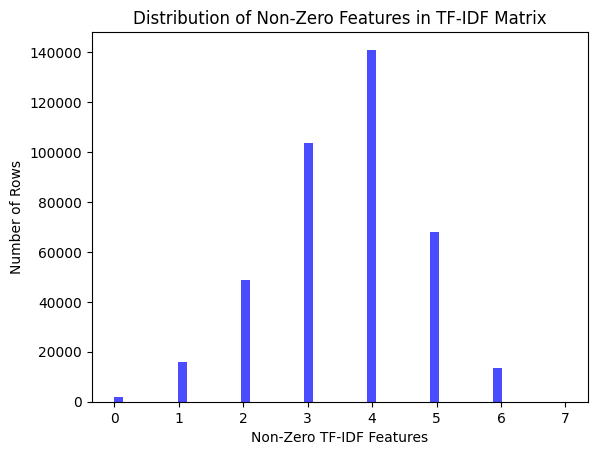

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Description'].fillna(''))

non_zero_counts = tfidf_matrix.getnnz(axis=1)

import pandas as pd
print("Non-zero counts per row (summary):")
print(pd.Series(non_zero_counts).describe())

import matplotlib.pyplot as plt
plt.hist(non_zero_counts, bins=50, color='blue', alpha=0.7)
plt.xlabel("Non-Zero TF-IDF Features")
plt.ylabel("Number of Rows")
plt.title("Distribution of Non-Zero Features in TF-IDF Matrix")
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['CountryEncoded'] = encoder.fit_transform(data['Country'])

In [31]:
# Convert the TF-IDF matrix to a DataFrame
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)

# Reset index to ensure alignment with `data`
tfidf_df.reset_index(drop=True, inplace=True)
data.reset_index(drop=True, inplace=True)

# Merge TF-IDF DataFrame into the original dataset
data = pd.concat([data, tfidf_df], axis=1)


In [40]:
# Identify TF-IDF feature columns (all columns after the original dataset)
tfidf_columns = tfidf_feature_names  # These are the feature words

# Filter rows where any TF-IDF value in these columns is non-zero
rows_with_tfidf_values = data[data[tfidf_columns].sum(axis=1) > 0]

# Display the filtered rows
print("Rows with non-zero TF-IDF values:")
print(rows_with_tfidf_values.head())


Rows with non-zero TF-IDF values:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

   Year  ...  wood  wooden  woodland  word  world  wrap  wreath  writing  \


In [41]:
# Check if the TF-IDF matrix has non-zero values
print("Non-zero entries in TF-IDF matrix:", tfidf_matrix.nnz)

Non-zero entries in TF-IDF matrix: 1409599


In [43]:
# Directly inspect non-zero values and their positions
non_zero_indices = tfidf_matrix.nonzero()
print("Non-zero positions (row, column):", list(zip(non_zero_indices[0][:10], non_zero_indices[1][:10])))  # First 10 non-zero elements


Non-zero positions (row, column): [(0, 486), (0, 219), (0, 223), (0, 270), (0, 226), (1, 486), (1, 292), (1, 262), (2, 128), (2, 224)]


In [44]:
# Get the feature names corresponding to the column indices
non_zero_positions = list(zip(non_zero_indices[0], non_zero_indices[1]))[:10]  # Limit to the first 10 for clarity

# Display the corresponding rows and features
print("Non-zero entries and their corresponding data:")
for row_idx, col_idx in non_zero_positions:
    description = data.loc[row_idx, 'Description']  # Get the description for the row
    feature_name = tfidf_feature_names[col_idx]     # Get the feature name for the column
    tfidf_value = tfidf_matrix[row_idx, col_idx]    # Get the TF-IDF value
    print(f"Row {row_idx} | Description: {description} | Feature: {feature_name} | TF-IDF Value: {tfidf_value}")


Non-zero entries and their corresponding data:
Row 0 | Description: WHITE HANGING HEART T-LIGHT HOLDER | Feature: white | TF-IDF Value: 0.4448267494821321
Row 0 | Description: WHITE HANGING HEART T-LIGHT HOLDER | Feature: hanging | TF-IDF Value: 0.469573063447078
Row 0 | Description: WHITE HANGING HEART T-LIGHT HOLDER | Feature: heart | TF-IDF Value: 0.38192072769864216
Row 0 | Description: WHITE HANGING HEART T-LIGHT HOLDER | Feature: light | TF-IDF Value: 0.4621773846811181
Row 0 | Description: WHITE HANGING HEART T-LIGHT HOLDER | Feature: holder | TF-IDF Value: 0.47133737797202996
Row 1 | Description: WHITE METAL LANTERN | Feature: white | TF-IDF Value: 0.4829952932053673
Row 1 | Description: WHITE METAL LANTERN | Feature: metal | TF-IDF Value: 0.48513040343991276
Row 1 | Description: WHITE METAL LANTERN | Feature: lantern | TF-IDF Value: 0.7289472123547006
Row 2 | Description: CREAM CUPID HEARTS COAT HANGER | Feature: cream | TF-IDF Value: 0.4242525266665898
Row 2 | Description: CR